# **HR ANALYSIS**





*IMPORTING REQUIRED LIBRARIES*

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


*IMPORTING DATA*

In [ ]:
df=pd.read_csv('/content/employe.csv')
df.head(5)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


*DATA INSPECTION*

In [ ]:
#shape of data
x=df.shape
print(f'rows:{x[0]} columns:{x[1]}')



rows:14999 columns:10


In [ ]:
#finding null values
df.isnull().sum()


,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
timeSpent.company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


from the above output it's clear that there's no null value

In [ ]:
#how many employees have already left the organization?
df['left'].value_counts()

,count
left,
0,11428
1,3571


Current workforce size: 11428


Number of employees who left: 3571

In [ ]:
# Gruping by departments
dept_summary = df.groupby('dept').agg(total_employees=('left', 'count'),employees_left=('left', 'sum'))
# Calculating attrition rate
dept_summary['attrition_rate (%)'] = (dept_summary['employees_left'] / dept_summary['total_employees']) * 100
print(dept_summary['attrition_rate (%)'].sort_values(ascending=False))

dept
hr             29.093369
accounting     26.597132
technical      25.625000
support        24.899058
sales          24.492754
marketing      23.659674
IT             22.249389
product_mng    21.951220
RandD          15.374841
management     14.444444
Name: attrition_rate (%), dtype: float64


HR department has the highest attrition rate

*GRAPHS AND ANALYSIS*

              total  left_count  attrition_rate (%)
few_projects                                       
False         12611        2004           15.890889
True           2388        1567           65.619765


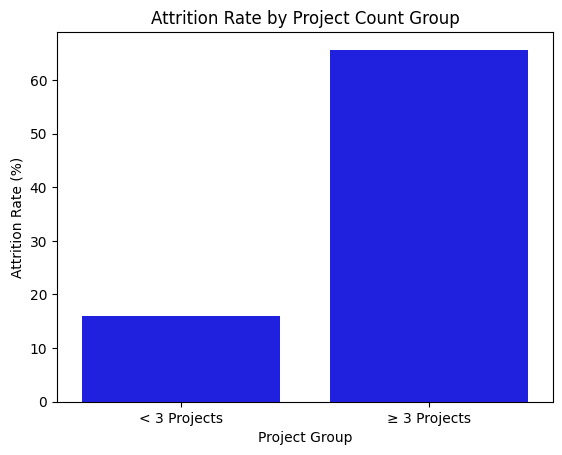

In [ ]:
#Are employees working on fewer than 3 projects more likely to leave the company?
df['few_projects'] = df['numberOfProjects'] < 3
# calculating attrition rates
project_groups = df.groupby('few_projects').agg(total=('left', 'count'),left_count=('left', 'sum'))
project_groups['attrition_rate (%)'] = (project_groups['left_count'] / project_groups['total']) * 100
print(project_groups)

#visualizing
labels = ['< 3 Projects', '≥ 3 Projects']
attrition_rates = project_groups['attrition_rate (%)'].values
sns.barplot(x=labels, y=attrition_rates, color='blue')
plt.title('Attrition Rate by Project Count Group')
plt.ylabel('Attrition Rate (%)')
plt.xlabel('Project Group')
plt.show()


the attrition rate of employers who work on fewer than 3 projects are likely to leave the company the percentage is about   65.619765.It shows that some employers would have left the company because of Underutilization


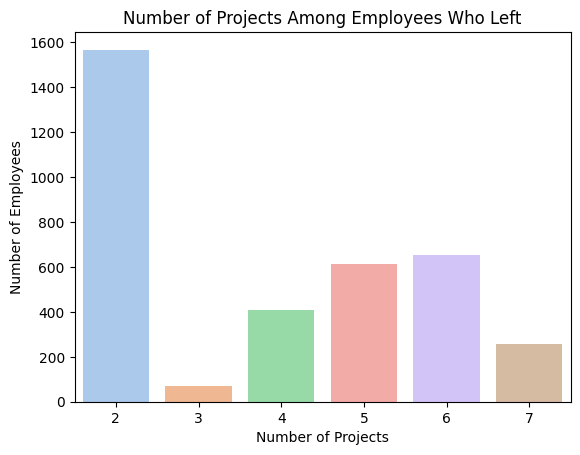

In [ ]:
#How does the number of projects correlate with time spent at the company,particularly for those who have left?
left_df = df[df['left'] == 1]
project_counts = left_df['numberOfProjects'].value_counts().sort_index()
# Plot bar chart
sns.barplot(x=project_counts.index, y=project_counts.values, palette='pastel')
plt.title('Number of Projects Among Employees Who Left')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


Employees who spent more time at the company also tended to handle more projects before leaving. This suggest that there is no balanced distribution of project at the company.

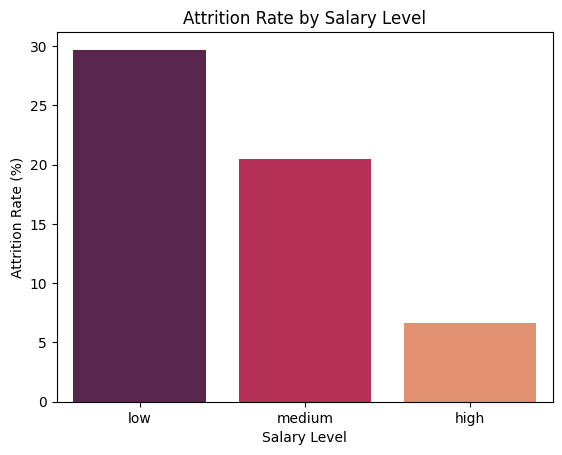

0     6.628941
1    29.688354
2    20.431275
Name: attrition_rate (%), dtype: float64


In [ ]:
#Could compensation levels be influencing an employee’s decision to leave?
salary_group = df.groupby('salary').agg(total=('left', 'count'),left_count=('left', 'sum'))
salary_group['attrition_rate (%)'] = (salary_group['left_count'] / salary_group['total']) * 100
salary_group = salary_group.reset_index()
# Bar plot
sns.barplot(data=salary_group, x='salary', y='attrition_rate (%)', order=['low', 'medium', 'high'], palette='rocket')
plt.title('Attrition Rate by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Attrition Rate (%)')
plt.show()
print(salary_group['attrition_rate (%)'])


Employers with low salary level have mostly left the company the attrition rate of them is around approximately 30 followed by employers with medium and high salary.


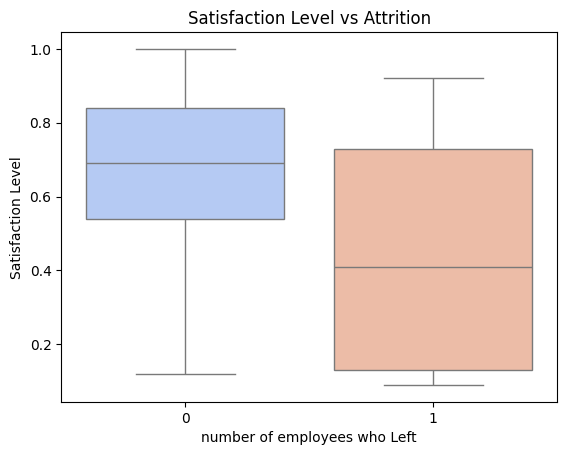

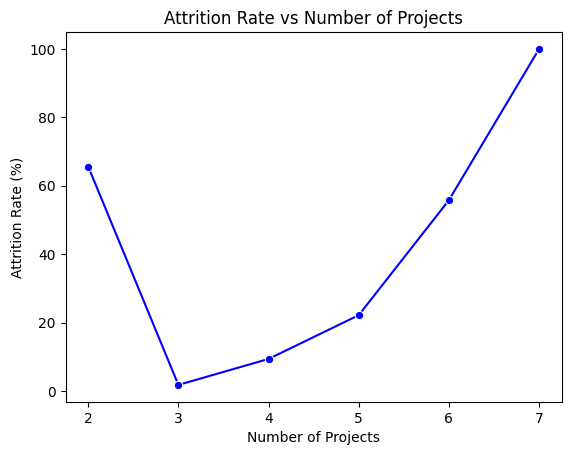

                  attrition_rate
numberOfProjects                
2                      65.619765
3                       1.775586
4                       9.369989
5                      22.165882
6                      55.792164
7                     100.000000


In [ ]:
#employee attrition patterns
# Satisfaction Level vs Attrition
sns.boxplot(x='left', y='satisfactoryLevel', data=df, palette='coolwarm')
plt.title('Satisfaction Level vs Attrition')
plt.xlabel('number of employees who Left')
plt.ylabel('Satisfaction Level')
plt.show()

#  Number of Projects vs Attrition
project_attrition = df.groupby('numberOfProjects')['left'].agg(['count', 'sum'])
project_attrition['attrition_rate'] = (project_attrition['sum'] / project_attrition['count']) * 100
sns.lineplot(x=project_attrition.index, y=project_attrition['attrition_rate'], marker='o', color='blue')
plt.title('Attrition Rate vs Number of Projects')
plt.xlabel('Number of Projects')
plt.ylabel('Attrition Rate (%)')
plt.show()
print(project_attrition[['attrition_rate']])


The line graph confirms a U-shaped relationship between number of projects and attrition rate.


Very Low Projects (2): 65.6% attrition — high risk of leaving due to under-engagement.


Moderate Projects (3–5): Attrition drops sharply (as low as ~1.8% for 3 projects).


High Projects (6–7):  55.8% at 6 projects and 100% at 7 projects, indicating overload.
This proves that employees are more likely to leave when they are either given heavy work load or low work load.


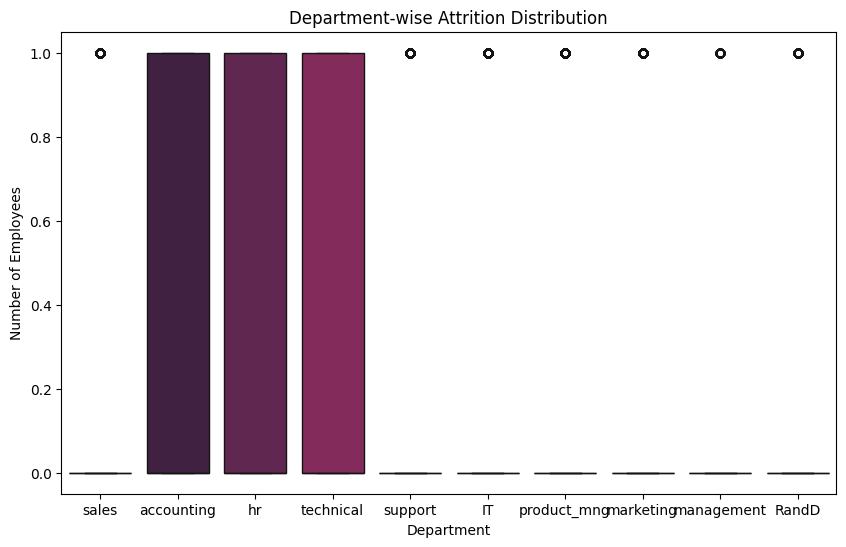

In [ ]:
#relationship between employee attrition and department
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='dept', y='left', palette='rocket')
plt.title('Department-wise Attrition Distribution')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()



Departments like HR and Accounting are seeing the highest employee turnover, while comparing with other departments. This could indicate issues like workload and unbalanced situation to a company.

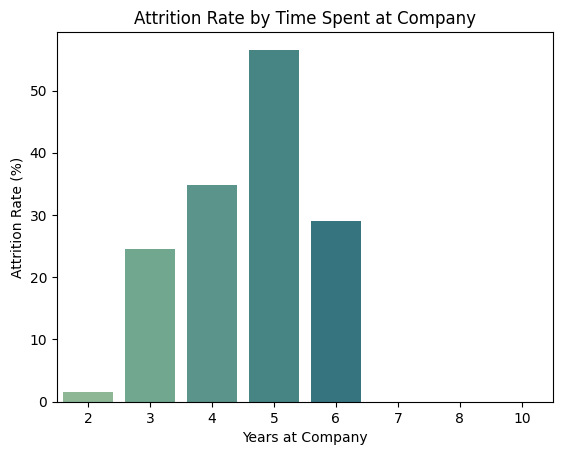

                   total  left_count  attrition_rate (%)
timeSpent.company                                       
2                   3244          53            1.633785
3                   6443        1586           24.615862
4                   2557         890           34.806414
5                   1473         833           56.551256
6                    718         209           29.108635
7                    188           0            0.000000
8                    162           0            0.000000
10                   214           0            0.000000


In [ ]:
#relation between time spent at a company and the employees who left
time_groups = df.groupby('timeSpent.company').agg(total=('left', 'count'),left_count=('left', 'sum'))
time_groups['attrition_rate (%)'] = (time_groups['left_count'] / time_groups['total']) * 100
sns.barplot(x=time_groups.index, y=time_groups['attrition_rate (%)'], palette='crest')
plt.title('Attrition Rate by Time Spent at Company')
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate (%)')
plt.show()
print(time_groups)


(2–3 years): the attrition rate is less it’s 1.633 and 24.615 for 2 and 3 years respectively.


(4–5 years): the attrition rate is high it is 34.80 and 66.55


(6+ years): very low attrition rate among the long-term employers indicating loyalty and settlement.


Retention strategies should focus on employees in their first 4 to 5years, as they are the most at risk of leaving.


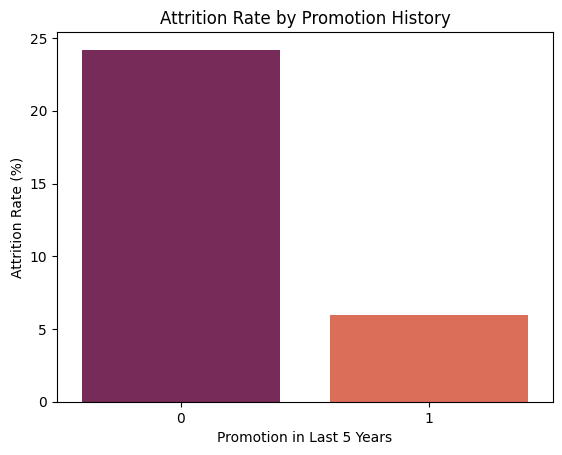

                       total  left_count  attrition_rate (%)
promotionInLast5years                                       
0                      14680        3552           24.196185
1                        319          19            5.956113


In [ ]:
#relation between promotion and attrition rate
promotion_group = df.groupby('promotionInLast5years').agg( total=('left', 'count'), left_count=('left', 'sum'))
promotion_group['attrition_rate (%)'] = (promotion_group['left_count'] / promotion_group['total']) * 100
sns.barplot(x=promotion_group.index, y=promotion_group['attrition_rate (%)'], palette='rocket')
plt.title('Attrition Rate by Promotion History')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Attrition Rate (%)')
plt.show()
print(promotion_group)


Employees with No Promotion in Last 5 Years has Significantly higher attrition rate which Indicates that lack of career advancement or recognition leads to dissatisfaction and increases the likelihood of leaving.


Employees Who Were Promoted have Very low attrition rate. and it Suggests that employees who receive promotions are more motivated, engaged, and likely to stay with the company.
This implies that career growth opportunities and recognition are critical for reducing employee turnover.
